## This notebook performs clustering, enrichment and network visualization, for a selected Ex netowrk from notebook 3

In [24]:
import pickle
from gprofiler import GProfiler
import nbimporter
import numpy as np
import pandas as pd
import networkx as nx
import OmicsIntegrator as oi
import community
from scipy import stats
import warnings
#import mygene
warnings.filterwarnings('ignore')
# Plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import ast
import seaborn as sns
plt.rcParams['font.family'] = 'Arial'

In [2]:
# import additional modules
import OI_utils as util
import graph_cell_network_edge_update as coi

In [3]:
# load output
output_dir = '../Network_Outputs/pickles/111221_cortex/'
mynetworks_cortex = pickle.load(open(output_dir + 'filtered_networks_cortex.pkl', 'rb'))
robust_summary_filtered = pickle.load(open(output_dir+'filtered_summaries_cortex.pkl', 'rb'))
robust_summary_unfiltered = pickle.load(open(output_dir+'unfiltered_summaries_cortex.pkl', 'rb'))
final_summary = pickle.load(open(output_dir+'final_summary.pkl', 'rb'))
int_df = pickle.load(open(output_dir+'int_df.pkl','rb'))

# define "mynetwork" --> for simplicity in notation, etc. We focus on Ex neuron network with hyperparam 
# W_1.00_B_50.00_G_5_K_10
mynetwork = mynetworks_cortex['Ex']['W_1.00_B_50.00_G_5_K_10']

In [4]:
print(len(mynetwork.nodes()))

306


In [6]:
# annotate steiner nodes
network_df = oi.get_networkx_graph_as_dataframe_of_nodes(mynetwork)

for node in mynetwork.nodes:
    if network_df.loc[node]['terminal'] == False:
        nx.set_node_attributes(mynetwork, {node: {'source': 'Steiner Node'}})
    if network_df.loc[node]['source'] == 'fly genetic screen':
        nx.set_node_attributes(mynetwork, {node: {'source': 'ND modifier'}})
    if network_df.loc[node]['source'] == "huntington's AOO modifiers":
        nx.set_node_attributes(mynetwork, {node: {'source': 'HD modifier'}})
network_df = oi.get_networkx_graph_as_dataframe_of_nodes(mynetwork)
network_df

,prize,source,magnitude,prize_val_original,naive_prize,score,terminal,type,degree,betweenness,louvain_clusters,location,general_process,specific_process,general_function,specific_function,robustness,specificity
VAMP2,0.093248,HD modifier,0.0,2.828175,0.053799,0.039449,True,protein,161,0.000355,10,vesicle,cellular process,secretion by cell,binding,protein binding,1.00,0.04
PTPN11,0.082876,ND modifier,0.0,2.177829,0.040530,0.042346,True,protein,298,0.000650,18,cytoplasm,biological regulation,regulation of biological process,catalytic,hydrolase,1.00,0.05
BICD1,0.072214,ND modifier,0.0,2.177829,0.040530,0.031684,True,protein,16,0.000002,3,cytoplasm,biological regulation,regulation of biological process,binding,protein binding,1.00,0.12
EXOC3,0.067781,ND modifier,0.0,2.177829,0.040530,0.027250,True,protein,71,0.000051,18,vesicle,localization,macromolecule localization,binding,protein binding,1.00,0.07
CUL1,0.077531,ND modifier,0.0,2.177829,0.040530,0.037001,True,protein,785,0.002200,8,protein complex,cellular process,cell communication,catalytic,transferase,1.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OAZ1,0.000000,Steiner Node,NaN,NaN,NaN,NaN,False,protein,30,0.000125,3,cytoplasm,biological regulation,regulation of biological process,molecular function regulator,enzyme regulator,0.66,0.03
RYR2,0.113489,ND modifier,0.0,2.177829,0.040530,0.072959,True,protein,39,0.000024,18,ER,biological regulation,regulation of biological process,binding,protein binding,1.00,0.12
GPX1,0.030462,HD modifier,0.0,1.684377,0.030462,0.000000,True,protein,38,0.000047,10,extracellular,cellular process,cellular response to stimulus,catalytic,oxidoreductase,0.57,0.03
ZFHX3,0.470551,HD modifier,0.0,23.818694,0.482071,-0.011520,True,protein,41,0.000024,4,nucleus,biological regulation,regulation of biological process,binding,protein binding,1.00,0.05


In [9]:
# update node attributes with filtered, pruned network
nx.set_node_attributes(mynetwork, {node: {'degree':degree} for node, degree in dict(mynetwork.degree()).items()})
oi.betweenness(mynetwork)
util.louvain_clustering(mynetwork, 1, 0)
network_df = oi.get_networkx_graph_as_dataframe_of_nodes(mynetwork)
network_df

,prize,source,magnitude,prize_val_original,naive_prize,score,terminal,type,degree,betweenness,louvain_clusters,location,general_process,specific_process,general_function,specific_function,robustness,specificity
VAMP2,0.093248,HD modifier,0.0,2.828175,0.053799,0.039449,True,protein,14,0.043728,9,vesicle,cellular process,secretion by cell,binding,protein binding,1.00,0.04
PTPN11,0.082876,ND modifier,0.0,2.177829,0.040530,0.042346,True,protein,7,0.010767,10,cytoplasm,biological regulation,regulation of biological process,catalytic,hydrolase,1.00,0.05
BICD1,0.072214,ND modifier,0.0,2.177829,0.040530,0.031684,True,protein,2,0.000197,4,cytoplasm,biological regulation,regulation of biological process,binding,protein binding,1.00,0.12
EXOC3,0.067781,ND modifier,0.0,2.177829,0.040530,0.027250,True,protein,8,0.011339,9,vesicle,localization,macromolecule localization,binding,protein binding,1.00,0.07
CUL1,0.077531,ND modifier,0.0,2.177829,0.040530,0.037001,True,protein,21,0.035980,6,protein complex,cellular process,cell communication,catalytic,transferase,1.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OAZ1,0.000000,Steiner Node,NaN,NaN,NaN,NaN,False,protein,3,0.007917,11,cytoplasm,biological regulation,regulation of biological process,molecular function regulator,enzyme regulator,0.66,0.03
RYR2,0.113489,ND modifier,0.0,2.177829,0.040530,0.072959,True,protein,2,0.000533,1,ER,biological regulation,regulation of biological process,binding,protein binding,1.00,0.12
GPX1,0.030462,HD modifier,0.0,1.684377,0.030462,0.000000,True,protein,2,0.000233,2,extracellular,cellular process,cellular response to stimulus,catalytic,oxidoreductase,0.57,0.03
ZFHX3,0.470551,HD modifier,0.0,23.818694,0.482071,-0.011520,True,protein,6,0.002111,1,nucleus,biological regulation,regulation of biological process,binding,protein binding,1.00,0.05


In [10]:
# generate subnetwork based on louvain_clustering
lv_clusters = util.get_subgraph_from_clusters(mynetwork, 'louvain_clusters')
lv_clusters

{0: <networkx.classes.graph.Graph at 0x7f1c0a067af0>,
 1: <networkx.classes.graph.Graph at 0x7f1c0a0674c0>,
 2: <networkx.classes.graph.Graph at 0x7f1c0a0677f0>,
 3: <networkx.classes.graph.Graph at 0x7f1ce0f228e0>,
 4: <networkx.classes.graph.Graph at 0x7f1ce0f22ca0>,
 5: <networkx.classes.graph.Graph at 0x7f1ce0f22c40>,
 6: <networkx.classes.graph.Graph at 0x7f1ce0f22a00>,
 7: <networkx.classes.graph.Graph at 0x7f1ce0f22940>,
 8: <networkx.classes.graph.Graph at 0x7f1c09fc1b50>,
 9: <networkx.classes.graph.Graph at 0x7f1c09fc1b80>,
 10: <networkx.classes.graph.Graph at 0x7f1c09fc1c70>,
 11: <networkx.classes.graph.Graph at 0x7f1c09fc1430>}

## gProfiler enrichment

Generates Supplementary Table 2

In [11]:
# gProfiler enrichment
sourcelist = ["GO:MF","GO:BP","KEGG","REAC"]
enrichment_results_louvain = util.get_pathway_enrichment(sourcelist, lv_clusters, 0.05, 3)

In [14]:
output_dir = '../Network_Outputs/gProfiler/'
with pd.ExcelWriter(output_dir+'enrichment_results_1_50_5_10_0.1_louvain_ex_cortex.xlsx') as writer:
    for i, df in enrichment_results_louvain.items():
        enrichment_results_louvain[i].to_excel(writer, sheet_name = 'Cluster ' + str(i))

In [19]:
print(len(lv_clusters[10].nodes()))

32


In [20]:
# left most column - 2 (from excel row)
loc_list = {0: [0, 28, 32, 63, 73], 1: [0], 2: [0], 3: [], 4: [0, 5, 6], 5: [4, 5], 6: [24, 33, 36, 45], 7: [], 8: [1], 
            9: [10, 19, 28], 
            10: [12, 34, 62], 11: []}
# change clusters
lv = True # false means leiden, true means louvain

if lv==True:
    for i in range(0,len(lv_clusters)):
        util.annotate_pathway_overlap(lv_clusters[i], enrichment_results_louvain[i], loc_list[i]) 
        util.annotate_pathway(lv_clusters[i], enrichment_results_louvain[i], loc_list[i]) # for individual coloring
        print(i)
else:
       
    for i in range(0,len(leiden_clusters)):
        annotate_pathway_overlap(leiden_clusters[i], enrichment_results_leiden[i], loc_list[i]) 
        annotate_pathway(leiden_clusters[i], enrichment_results_leiden[i], loc_list[i]) # for individual coloring

0
1
2
3
4
5
6
7
8
9
10
11


In [21]:
# disregard other data, only take Direction and data_source
def annotate_graph(clusters, anno_df):
    # annotate GWA effect size, direction
    for index, row in anno_df.iterrows():
        for i in range(0,len(clusters)):
            network = clusters[i]
            source = row['data_source']
            direction = row['Direction']
            nx.set_node_attributes(network, {index: {'Data_source': source, 'Direction': str(direction)}})
    for i in range(0, len(clusters)):
        for node in clusters[i].nodes():
            if node in anno_df.index:
                pass
            else:
                nx.set_node_attributes(clusters[i], {node: {'Direction': 'NA'}})

In [23]:
# annotate modifiers with directions
prize_annotation = pd.read_csv('../Prize_Inputs/effect_size_annotation.csv', index_col=0)
annotate_graph(lv_clusters, prize_annotation)

In [28]:
# save dictionary of networks annotated with GO terms
# saving html for overview inspection
outputdir = '../Network_Outputs/pickles/111221_cortex/Ex_W01_B50_G05_K10_w10'
 
for key in lv_clusters.keys():
    network = lv_clusters[key]
    oi.output_networkx_graph_as_interactive_html(network, output_dir = outputdir + '/html/', filename = 'Cluster_{}_robust_network.html'.format(key))

In [29]:
# output mynetwork with the new annotations
outputdir = '../Network_Outputs/pickles/111221_cortex/Ex_W01_B50_G05_K10_w10/'
with open(outputdir + 'mynetwork.pkl', "wb") as f: # change directory to output
    pickle.dump(mynetwork, f)
    
with open(outputdir + 'lv_clusters.pkl', "wb") as f: # change directory to output
    pickle.dump(lv_clusters, f)

## Network overview plot (Pie Chart - Figure 2)

In [31]:
# get. full network
# load full network from Ver 1 network
outputdir = '../Network_Outputs/pickles/111221_cortex/Ex_W01_B50_G05_K10_w10/'
mynetwork = pickle.load(open(outputdir + 'mynetwork.pkl', 'rb'))
lv_clusters = pickle.load(open(outputdir + 'lv_clusters.pkl', 'rb'))
print(len(mynetwork.nodes()))

306


In [32]:
# generate node_dfs
node_dfs = {}
for cluster, network in lv_clusters.items():
    df = oi.get_networkx_graph_as_dataframe_of_nodes(network)
    node_dfs[cluster] = df.copy()
node_dfs[10]

,prize,source,magnitude,prize_val_original,naive_prize,score,terminal,type,degree,betweenness,...,specificity,pathway,path_2,pval_2,Direction,path_1,pval_1,path_3,pval_3,Data_source
HRAS,0.061020,ND modifier,0.0,2.177829,0.040530,0.020490,True,protein,20,0.047807,...,0.01,REAC:R-HSA-9675108: Nervous system development,REAC:R-HSA-9675108: Nervous system development,0.004609327074774481,NA,NaN,NaN,NaN,NaN,NaN
ARPC3,0.064572,ND modifier,0.0,2.177829,0.040530,0.024042,True,protein,5,0.003575,...,0.05,GO:0007015: actin filament organization,REAC:R-HSA-9675108: Nervous system development,0.004609327074774481,NA,REAC:R-HSA-2029482: Regulation of actin dynami...,0.030566708382588806,GO:0007015: actin filament organization,0.0003311074283242785,NaN
MAN2A1,0.000000,Steiner Node,NaN,NaN,NaN,NaN,False,protein,2,0.000586,...,0.00,NaN,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN
ERBB3,0.020207,ND modifier,0.0,2.177829,0.040530,-0.020323,True,protein,10,0.014667,...,0.06,NaN,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN
SNX8,0.059404,HD modifier,0.0,1.229895,0.021189,0.038214,True,protein,2,0.000196,...,0.05,NaN,NaN,NaN,Positive,NaN,NaN,NaN,NaN,GEM Mega eQTL
SNAP91,0.000000,Steiner Node,NaN,NaN,NaN,NaN,False,protein,3,0.000441,...,0.04,NaN,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN
FLOT1,0.059157,HD modifier,0.0,1.296851,0.022555,0.036601,True,protein,7,0.015797,...,0.04,NaN,NaN,NaN,Positive,NaN,NaN,NaN,NaN,GEM Mega eQTL
RASA1,0.070547,ND modifier,0.0,2.177829,0.040530,0.030016,True,protein,7,0.011640,...,0.03,GO:0007015: actin filament organization,REAC:R-HSA-9675108: Nervous system development,0.004609327074774481,NA,NaN,NaN,GO:0007015: actin filament organization,0.0003311074283242785,NaN
DAB1,0.000000,Steiner Node,NaN,NaN,NaN,NaN,False,protein,6,0.008833,...,0.04,REAC:R-HSA-9675108: Nervous system development,REAC:R-HSA-9675108: Nervous system development,0.004609327074774481,NA,NaN,NaN,NaN,NaN,NaN
HYAL3,0.093859,HD modifier,0.0,4.032110,0.078363,0.015496,True,protein,1,0.000000,...,0.04,NaN,NaN,NaN,Negative,NaN,NaN,NaN,NaN,GEM Mega eQTL


In [33]:
node_dfs[7]

,prize,source,magnitude,prize_val_original,naive_prize,score,terminal,type,degree,betweenness,louvain_clusters,location,general_process,specific_process,general_function,specific_function,robustness,specificity,Direction
FGF14,0.000000,Steiner Node,NaN,NaN,NaN,NaN,False,protein,3,0.019586,7,nucleus,biological regulation,regulation of biological process,binding,protein binding,1.0,0.09,NA
SYT14,0.102814,ND modifier,0.0,2.177829,0.04053,0.062284,True,protein,1,0.000000,7,plasma_membrane,cellular process,cell communication,binding,protein binding,1.0,0.03,NA
SYT16,0.000000,Steiner Node,NaN,NaN,NaN,NaN,False,protein,2,0.006557,7,plasma_membrane,cellular process,cell communication,binding,protein binding,1.0,0.07,NA
SCN8A,0.110025,ND modifier,0.0,2.177829,0.04053,0.069495,True,protein,1,0.000000,7,protein complex,multicellular organismal process,multicellular organism development,transporter,transmembrane transporter,1.0,0.04,NA


In [34]:
# sub-categorize node_dfs into VZ vs GEM vs ND vs Steiner
for cluster, df in node_dfs.items():
    print(cluster)
    if cluster!=7: # exclude 7 (small network < 5)
        df['pie_source'] = df.apply(lambda row: 'ND Modifier' if row['source'] == 'ND modifier' else '', axis=1)

    # Check if "source" category is equal to "Steiner Node"
        df.loc[df['source'] == 'Steiner Node', 'pie_source'] = 'Predicted Node'

    # Check if "source" category is equal to "HD modifier" and then check "Data_source"
        df.loc[df['source'] == 'HD modifier', 'pie_source'] = df[df['source'] == 'HD modifier']['Data_source'].apply(lambda x: 'GEM-HD' if x.startswith('GEM') else ('Venezuelan WGS' if x.startswith('VZ') else ''))
        node_dfs[cluster] = df.copy()
node_dfs[10]

0
1
2
3
4
5
6
7
8
9
10
11


,prize,source,magnitude,prize_val_original,naive_prize,score,terminal,type,degree,betweenness,...,pathway,path_2,pval_2,Direction,path_1,pval_1,path_3,pval_3,Data_source,pie_source
HRAS,0.061020,ND modifier,0.0,2.177829,0.040530,0.020490,True,protein,20,0.047807,...,REAC:R-HSA-9675108: Nervous system development,REAC:R-HSA-9675108: Nervous system development,0.004609327074774481,NA,NaN,NaN,NaN,NaN,NaN,ND Modifier
ARPC3,0.064572,ND modifier,0.0,2.177829,0.040530,0.024042,True,protein,5,0.003575,...,GO:0007015: actin filament organization,REAC:R-HSA-9675108: Nervous system development,0.004609327074774481,NA,REAC:R-HSA-2029482: Regulation of actin dynami...,0.030566708382588806,GO:0007015: actin filament organization,0.0003311074283242785,NaN,ND Modifier
MAN2A1,0.000000,Steiner Node,NaN,NaN,NaN,NaN,False,protein,2,0.000586,...,NaN,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,Predicted Node
ERBB3,0.020207,ND modifier,0.0,2.177829,0.040530,-0.020323,True,protein,10,0.014667,...,NaN,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,ND Modifier
SNX8,0.059404,HD modifier,0.0,1.229895,0.021189,0.038214,True,protein,2,0.000196,...,NaN,NaN,NaN,Positive,NaN,NaN,NaN,NaN,GEM Mega eQTL,GEM-HD
SNAP91,0.000000,Steiner Node,NaN,NaN,NaN,NaN,False,protein,3,0.000441,...,NaN,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,Predicted Node
FLOT1,0.059157,HD modifier,0.0,1.296851,0.022555,0.036601,True,protein,7,0.015797,...,NaN,NaN,NaN,Positive,NaN,NaN,NaN,NaN,GEM Mega eQTL,GEM-HD
RASA1,0.070547,ND modifier,0.0,2.177829,0.040530,0.030016,True,protein,7,0.011640,...,GO:0007015: actin filament organization,REAC:R-HSA-9675108: Nervous system development,0.004609327074774481,NA,NaN,NaN,GO:0007015: actin filament organization,0.0003311074283242785,NaN,ND Modifier
DAB1,0.000000,Steiner Node,NaN,NaN,NaN,NaN,False,protein,6,0.008833,...,REAC:R-HSA-9675108: Nervous system development,REAC:R-HSA-9675108: Nervous system development,0.004609327074774481,NA,NaN,NaN,NaN,NaN,NaN,Predicted Node
HYAL3,0.093859,HD modifier,0.0,4.032110,0.078363,0.015496,True,protein,1,0.000000,...,NaN,NaN,NaN,Negative,NaN,NaN,NaN,NaN,GEM Mega eQTL,GEM-HD


In [35]:
# annotate each subnetwork for final overview plot
annots = {}
annots[0] = 'Generation of neurons'
annots[1] = 'none' # none
annots[2] = 'Growth'
annots[3] = 'none' # none
annots[4] = 'Vesicle-mediated transport'
annots[5] = 'ESCRT'
annots[6] = 'Ubiquitination'
annots[7] = 'none' # none
annots[8] = 'Response to estradiol'
annots[9] = 'Synaptic signaling'
annots[10] = 'Neuron projection development'
annots[11] = 'none' # too small.

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


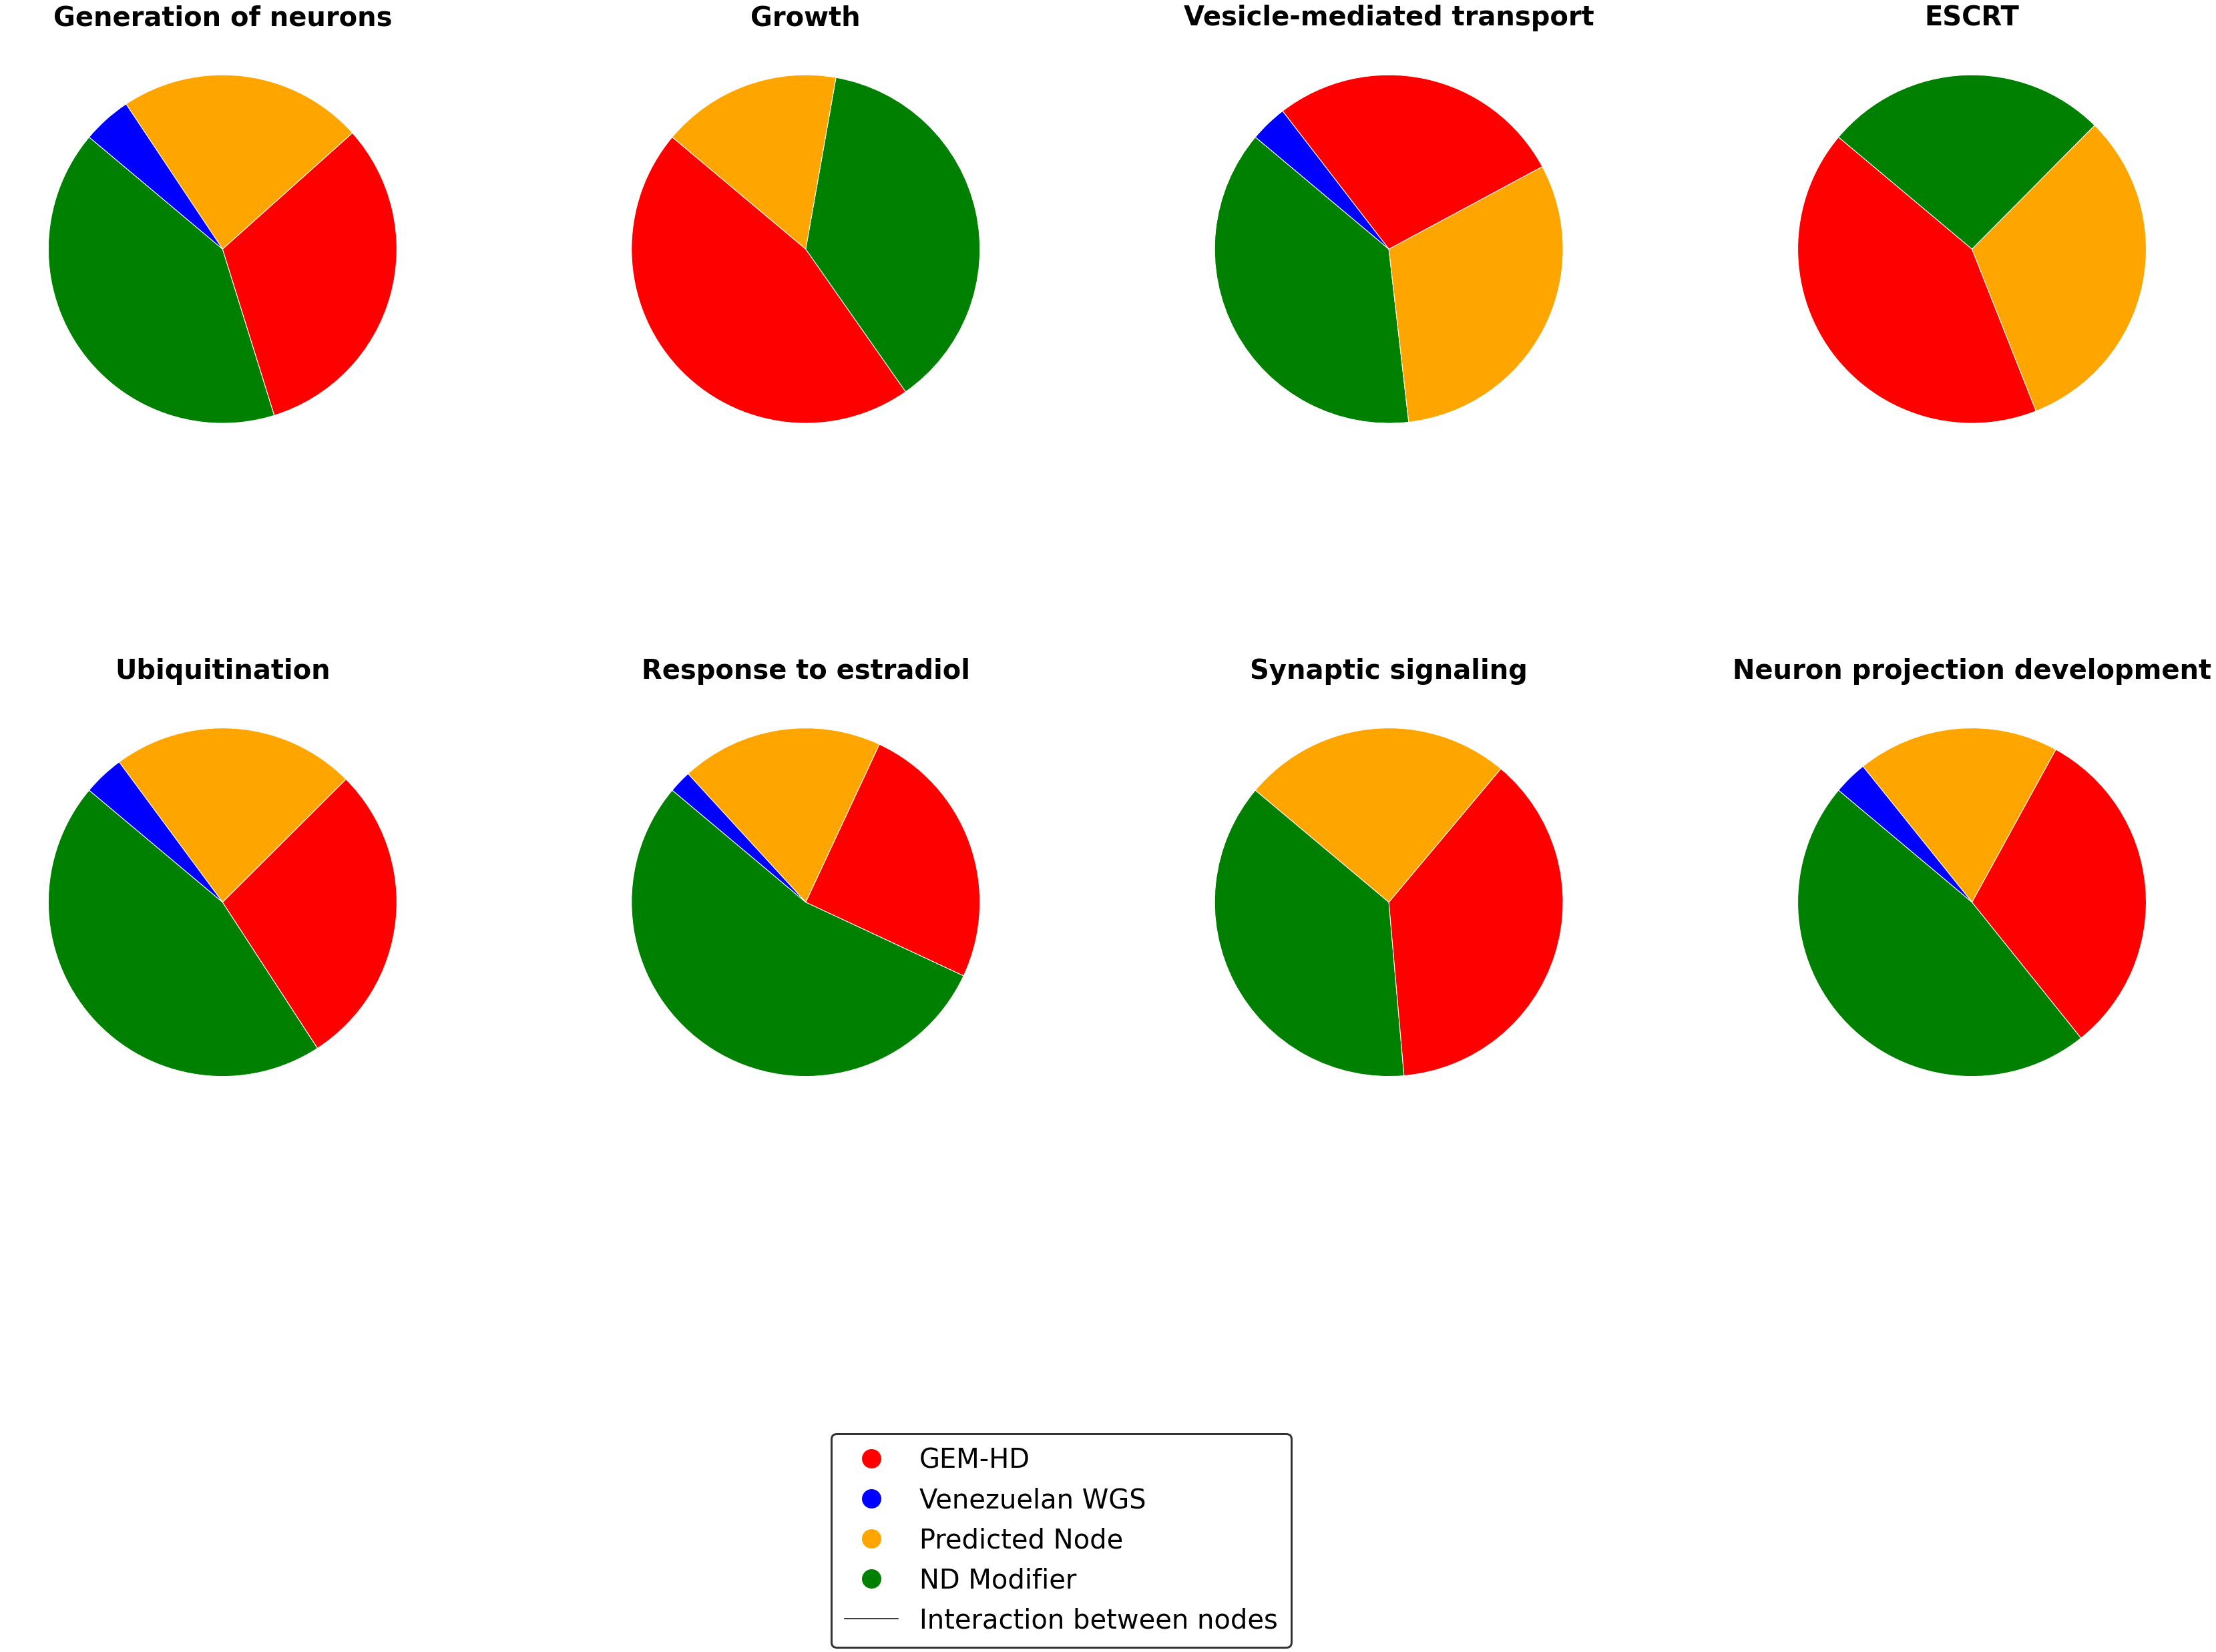

In [36]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Define consistent colors for each class
class_colors = {'GEM-HD': 'red', 'Venezuelan WGS': 'blue', 'Predicted Node': 'orange',
                'ND Modifier': 'green'}

# Function to create pie chart for a cluster
def plot_cluster_pie(cluster_id, cluster_df, ax):
    
    classes_count = cluster_df['pie_source'].value_counts()
    labels = classes_count.index
    sizes = classes_count.values
    
    colors = [class_colors.get(label, 'gray') for label in labels]  # Using consistent color map
    patches, _ = ax.pie(sizes, labels=None, startangle=140, colors=colors)
    for patch in patches:
        patch.set_edgecolor('white')
    ax.set_title(f'{annots[cluster_id]}', fontsize=40, fontweight = 'bold')
    ax.axis('off')

# Create subplots for all clusters
fig, axs = plt.subplots(2, 4, figsize=(60, 30))
fig.subplots_adjust(hspace=0.5)

axs = axs.ravel()
inds = [0,2,4,5,6,8,9,10]
for i in range(8):
    ax = axs[i]
    
    if i in node_dfs:
        ind = inds[i]
        plot_cluster_pie(ind, node_dfs[ind], ax)
    else:
        ax.axis('off')  # If cluster not found, turn off the axis

# Manually create legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=30)
                   for label, color in class_colors.items()]
# Add additional legend element for lines
line_legend_element = Line2D([0], [0], color='black', label='Interaction between nodes', markersize=30, linestyle='-')

legend_elements.append(line_legend_element)

legend = fig.legend(handles=legend_elements, labels=[*class_colors.keys(), 'Interaction between nodes'], loc='lower center', ncol=1,
                    fontsize=40, borderpad=0.5, edgecolor='black',
                    bbox_to_anchor = (0.5, -0.25),bbox_transform=plt.gcf().transFigure)
                     # Adjust title_pad to position the legend title above the bounding box
plt.setp(legend.get_title(), color='black')  # Set legend title color
legend.get_frame().set_linewidth(3)

plt.savefig('../Figures/network_overview_pie.png', format='png', bbox_inches='tight')
plt.savefig('../Figures/network_overview_pie.eps', format='eps', bbox_inches='tight')

plt.show()

## Network Enrichment Plot

In [39]:
# perform enrichment for GO and Reactome using all network nodes
# perform GO enrichment on Ver 1 network all connected;
outputdir = f'../Network_Outputs/gProfiler'

source_list = ['GO:BP']    
gp = GProfiler(return_dataframe = True)
ER_full_GOBP = gp.profile(organism = 'hsapiens', query = list(mynetwork.nodes()),
                                    sources = source_list, no_evidences=False)
with pd.ExcelWriter(outputdir + f'/ER_full_GOBP_Ver1.xlsx') as writer:
    ER_full_GOBP.to_excel(writer)
ER_full_GOBP

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences
0,GO:BP,GO:0051649,establishment of localization in cell,4.899319e-20,True,"""Any process, occuring in a cell, that localiz...",1972,286,86,21031,0.300699,0.043611,query_1,"[GO:0051234, GO:0051641]","[VAMP2, PTPN11, BICD1, EXOC3, HSP90B1, SYT9, A...","[[IMP, ISS, TAS], [IEA], [IMP], [NAS], [IMP], ..."
1,GO:BP,GO:0051641,cellular localization,4.624712e-15,True,"""A cellular localization process whereby a sub...",3621,286,111,21031,0.388112,0.030655,query_1,"[GO:0009987, GO:0051179]","[VAMP2, PTPN11, BICD1, EXOC3, HSP90B1, RABEP1,...","[[IMP, ISS, TAS], [IEA], [IDA, IMP, IGI, IBA, ..."
2,GO:BP,GO:0051128,regulation of cellular component organization,3.186180e-14,True,"""Any process that modulates the frequency, rat...",2425,286,86,21031,0.300699,0.035464,query_1,"[GO:0016043, GO:0050794]","[PTPN11, BICD1, FHOD3, SYT9, HNF4A, RAP2A, ITS...","[[IDA], [IMP, IGI, IBA], [IEA], [IEA], [IMP], ..."
3,GO:BP,GO:0071705,nitrogen compound transport,1.119214e-13,True,"""The directed movement of nitrogen-containing ...",1911,286,74,21031,0.258741,0.038723,query_1,[GO:0006810],"[VAMP2, PTPN11, EXOC3, HSP90B1, RABEP1, SYT9, ...","[[ISS], [IEA], [IEA], [IMP, NAS], [IEA], [IBA]..."
4,GO:BP,GO:0033036,macromolecule localization,1.945926e-13,True,"""Any process in which a macromolecule is trans...",3210,286,100,21031,0.349650,0.031153,query_1,[GO:0051179],"[VAMP2, PTPN11, BICD1, EXOC3, HSP90B1, RABEP1,...","[[ISS], [IEA], [IDA, IGI, IBA, NAS], [IEA], [I..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,GO:BP,GO:0042063,gliogenesis,4.448975e-02,True,"""The process that results in the generation of...",345,286,16,21031,0.055944,0.046377,query_1,[GO:0022008],"[PTPN11, ERBB3, NR1D1, MAPT, PICK1, PRKCI, DLL...","[[IEA], [ISS, IEA], [ISS, IEA], [TAS], [ISS], ..."
228,GO:BP,GO:0048708,astrocyte differentiation,4.495393e-02,True,"""The process in which a relatively unspecializ...",86,286,8,21031,0.027972,0.093023,query_1,"[GO:0007417, GO:0010001]","[PTPN11, NR1D1, MAPT, DLL1, PAX6, PSEN1, DAB1,...","[[IEA], [ISS, IEA], [TAS], [ISS, IEA], [IEA], ..."
229,GO:BP,GO:0051240,positive regulation of multicellular organisma...,4.684048e-02,True,"""Any process that activates or increases the f...",1637,286,43,21031,0.150350,0.026268,query_1,"[GO:0032501, GO:0048518, GO:0051239]","[PTPN11, GADD45G, ERBB3, NCK1, ROCK1, CUX1, ST...","[[ISS, TAS, IEA], [ISS], [IEA], [IMP], [IMP, I..."
230,GO:BP,GO:0016358,dendrite development,4.922254e-02,True,"""The process whose specific outcome is the pro...",238,286,13,21031,0.045455,0.054622,query_1,"[GO:0031175, GO:0048856]","[RAP2A, CUX1, RTN4IP1, MARK1, UBA6, WASL, PSEN...","[[IDA], [ISS], [ISS], [ISS, IEA], [IEA], [ISS,..."


In [7]:
outputdir = f'../Network_Outputs/gProfiler'
ER_full_GOBP = pd.read_excel(f'{outputdir}/ER_full_GOBP_Ver1.xlsx', index_col = 0)
ER_full_GOBP

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences
0,GO:BP,GO:0051649,establishment of localization in cell,4.899319e-20,True,"""Any process, occuring in a cell, that localiz...",1972,286,86,21031,0.300699,0.043611,query_1,"['GO:0051234', 'GO:0051641']","['VAMP2', 'PTPN11', 'BICD1', 'EXOC3', 'HSP90B1...","[['IMP', 'ISS', 'TAS'], ['IEA'], ['IMP'], ['NA..."
1,GO:BP,GO:0051641,cellular localization,4.624712e-15,True,"""A cellular localization process whereby a sub...",3621,286,111,21031,0.388112,0.030655,query_1,"['GO:0009987', 'GO:0051179']","['VAMP2', 'PTPN11', 'BICD1', 'EXOC3', 'HSP90B1...","[['IMP', 'ISS', 'TAS'], ['IEA'], ['IDA', 'IMP'..."
2,GO:BP,GO:0051128,regulation of cellular component organization,3.186180e-14,True,"""Any process that modulates the frequency, rat...",2425,286,86,21031,0.300699,0.035464,query_1,"['GO:0016043', 'GO:0050794']","['PTPN11', 'BICD1', 'FHOD3', 'SYT9', 'HNF4A', ...","[['IDA'], ['IMP', 'IGI', 'IBA'], ['IEA'], ['IE..."
3,GO:BP,GO:0071705,nitrogen compound transport,1.119214e-13,True,"""The directed movement of nitrogen-containing ...",1911,286,74,21031,0.258741,0.038723,query_1,['GO:0006810'],"['VAMP2', 'PTPN11', 'EXOC3', 'HSP90B1', 'RABEP...","[['ISS'], ['IEA'], ['IEA'], ['IMP', 'NAS'], ['..."
4,GO:BP,GO:0033036,macromolecule localization,1.945926e-13,True,"""Any process in which a macromolecule is trans...",3210,286,100,21031,0.349650,0.031153,query_1,['GO:0051179'],"['VAMP2', 'PTPN11', 'BICD1', 'EXOC3', 'HSP90B1...","[['ISS'], ['IEA'], ['IDA', 'IGI', 'IBA', 'NAS'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,GO:BP,GO:0042063,gliogenesis,4.448975e-02,True,"""The process that results in the generation of...",345,286,16,21031,0.055944,0.046377,query_1,['GO:0022008'],"['PTPN11', 'ERBB3', 'NR1D1', 'MAPT', 'PICK1', ...","[['IEA'], ['ISS', 'IEA'], ['ISS', 'IEA'], ['TA..."
228,GO:BP,GO:0048708,astrocyte differentiation,4.495393e-02,True,"""The process in which a relatively unspecializ...",86,286,8,21031,0.027972,0.093023,query_1,"['GO:0007417', 'GO:0010001']","['PTPN11', 'NR1D1', 'MAPT', 'DLL1', 'PAX6', 'P...","[['IEA'], ['ISS', 'IEA'], ['TAS'], ['ISS', 'IE..."
229,GO:BP,GO:0051240,positive regulation of multicellular organisma...,4.684048e-02,True,"""Any process that activates or increases the f...",1637,286,43,21031,0.150350,0.026268,query_1,"['GO:0032501', 'GO:0048518', 'GO:0051239']","['PTPN11', 'GADD45G', 'ERBB3', 'NCK1', 'ROCK1'...","[['ISS', 'TAS', 'IEA'], ['ISS'], ['IEA'], ['IM..."
230,GO:BP,GO:0016358,dendrite development,4.922254e-02,True,"""The process whose specific outcome is the pro...",238,286,13,21031,0.045455,0.054622,query_1,"['GO:0031175', 'GO:0048856']","['RAP2A', 'CUX1', 'RTN4IP1', 'MARK1', 'UBA6', ...","[['IDA'], ['ISS'], ['ISS'], ['ISS', 'IEA'], ['..."


(array([120.,  53.,  27.,  10.,  10.,   5.,   3.,   1.,   0.,   3.]),
 array([9.00000e+00, 1.27610e+03, 2.54320e+03, 3.81030e+03, 5.07740e+03,
        6.34450e+03, 7.61160e+03, 8.87870e+03, 1.01458e+04, 1.14129e+04,
        1.26800e+04]),
 <BarContainer object of 10 artists>)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


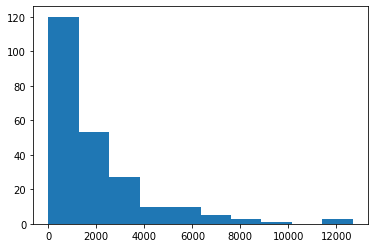

In [11]:
plt.hist(ER_full_GOBP.term_size)

In [15]:
df = ER_full_GOBP[ER_full_GOBP.term_size<500]
df

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences
31,GO:BP,GO:0051656,establishment of organelle localization,5.757582e-08,True,"""The directed movement of an organelle to a sp...",486,286,29,21031,0.101399,0.059671,query_1,"['GO:0051234', 'GO:0051640']","['BICD1', 'EXOC3', 'MAPRE1', 'EXOC4', 'SYT4', ...","[['IMP'], ['NAS'], ['IDA'], ['NAS', 'IEA'], ['..."
34,GO:BP,GO:0140029,exocytic process,1.157889e-07,True,"""The cellular processes that contribute to exo...",80,286,13,21031,0.045455,0.162500,query_1,"['GO:0006887', 'GO:0009987']","['EXOC3', 'SYT9', 'EXOC4', 'SYT1', 'RAB3C', 'S...","[['NAS'], ['IEA'], ['NAS', 'IEA'], ['IEA'], ['..."
45,GO:BP,GO:0099003,vesicle-mediated transport in synapse,4.880427e-07,True,"""Any vesicle-mediated transport that occurs in...",223,286,19,21031,0.066434,0.085202,query_1,['GO:0016192'],"['VAMP2', 'SYT9', 'ITSN2', 'ROCK1', 'SYT4', 'S...","[['ISS', 'TAS'], ['IEA'], ['IBA'], ['IGI'], ['..."
46,GO:BP,GO:0051648,vesicle localization,5.268246e-07,True,"""Any process in which a vesicle or vesicles ar...",224,286,19,21031,0.066434,0.084821,query_1,['GO:0051640'],"['EXOC3', 'EXOC4', 'SYT4', 'AP3S2', 'SNAP29', ...","[['NAS'], ['NAS', 'IEA'], ['ISS', 'IEA'], ['IS..."
48,GO:BP,GO:0099504,synaptic vesicle cycle,6.002170e-07,True,"""A biological process in which synaptic vesicl...",200,286,18,21031,0.062937,0.090000,query_1,"['GO:0051649', 'GO:0099003']","['VAMP2', 'SYT9', 'ITSN2', 'ROCK1', 'SYT4', 'S...","[['ISS', 'TAS'], ['IEA'], ['IBA'], ['IGI'], ['..."
51,GO:BP,GO:0051650,establishment of vesicle localization,8.984828e-07,True,"""The directed movement of a vesicle to a speci...",205,286,18,21031,0.062937,0.087805,query_1,"['GO:0051648', 'GO:0051649', 'GO:0051656']","['EXOC3', 'EXOC4', 'SYT4', 'AP3S2', 'SNAP29', ...","[['NAS'], ['NAS', 'IEA'], ['ISS', 'IEA'], ['IS..."
62,GO:BP,GO:0048193,Golgi vesicle transport,2.173126e-06,True,"""The directed movement of substances into, out...",301,286,21,21031,0.073427,0.069767,query_1,['GO:0016192'],"['VAMP2', 'RABEP1', 'CUX1', 'EXOC4', 'PICK1', ...","[['ISS'], ['ISS', 'IBA', 'IEA'], ['IEA'], ['IB..."
63,GO:BP,GO:0016050,vesicle organization,2.358265e-06,True,"""A process that is carried out at the cellular...",364,286,23,21031,0.080420,0.063187,query_1,['GO:0006996'],"['VAMP2', 'SYT9', 'SYT4', 'SYT1', 'AP3S2', 'SN...","[['IMP', 'IBA'], ['IEA'], ['IBA', 'IEA'], ['IE..."
90,GO:BP,GO:0006892,post-Golgi vesicle-mediated transport,4.487297e-05,True,"""The directed movement of substances from the ...",106,286,12,21031,0.041958,0.113208,query_1,['GO:0048193'],"['VAMP2', 'RABEP1', 'EXOC4', 'AP3S2', 'AP1G2',...","[['ISS'], ['ISS', 'IBA', 'IEA'], ['IBA'], ['IE..."
95,GO:BP,GO:0022406,membrane docking,7.800189e-05,True,"""The initial attachment of a membrane or prote...",90,286,11,21031,0.038462,0.122222,query_1,['GO:0009987'],"['EXOC3', 'ROCK1', 'EXOC4', 'SYT1', 'RAB3C', '...","[['NAS'], ['IDA'], ['NAS', 'IEA'], ['IEA'], ['..."


In [16]:
df.shape

(50, 16)

In [40]:
source_list = ['REAC']    
gp = GProfiler(return_dataframe = True)
ER_full_REAC = gp.profile(organism = 'hsapiens', query = list(mynetwork.nodes()),
                                    sources = source_list, no_evidences=False)
with pd.ExcelWriter(outputdir + f'/ER_full_REAC_Ver1.xlsx') as writer:
    ER_full_REAC.to_excel(writer)
ER_full_REAC

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences
0,REAC,REAC:R-HSA-199991,Membrane Trafficking,1.707375e-08,True,Membrane Trafficking,624,208,39,10842,0.187500,0.062500,query_1,[REAC:R-HSA-5653656],"[VAMP2, BICD1, EXOC3, RABEP1, SYT9, ITSN2, CUX...","[[REAC], [REAC], [REAC], [REAC], [REAC], [REAC..."
1,REAC,REAC:R-HSA-5653656,Vesicle-mediated transport,8.211321e-08,True,Vesicle-mediated transport,718,208,41,10842,0.197115,0.057103,query_1,[REAC:0000000],"[VAMP2, BICD1, EXOC3, HSP90B1, RABEP1, SYT9, I...","[[REAC], [REAC], [REAC], [REAC], [REAC], [REAC..."
2,REAC,REAC:R-HSA-1643685,Disease,1.325619e-02,True,Disease,1767,208,57,10842,0.274038,0.032258,query_1,[REAC:0000000],"[VAMP2, PTPN11, CUL1, NCK1, ROCK1, HLA-C, CSNK...","[[REAC], [REAC], [REAC], [REAC], [REAC], [REAC..."
3,REAC,REAC:R-HSA-5620916,VxPx cargo-targeting to cilium,1.720825e-02,True,VxPx cargo-targeting to cilium,21,208,5,10842,0.024038,0.238095,query_1,[REAC:R-HSA-5620920],"[EXOC3, EXOC4, EXOC6, GBF1, EXOC8]","[[REAC], [REAC], [REAC], [REAC], [REAC]]"
4,REAC,REAC:R-HSA-432720,Lysosome Vesicle Biogenesis,2.075169e-02,True,Lysosome Vesicle Biogenesis,35,208,6,10842,0.028846,0.171429,query_1,[REAC:R-HSA-199992],"[VAMP2, AP1G2, AP1G1, CLTB, APP, ARF1]","[[REAC], [REAC], [REAC], [REAC], [REAC], [REAC]]"
5,REAC,REAC:R-HSA-264876,Insulin processing,4.220743e-02,True,Insulin processing,25,208,5,10842,0.024038,0.200000,query_1,[REAC:R-HSA-2980736],"[VAMP2, EXOC3, EXOC4, EXOC6, EXOC8]","[[REAC], [REAC], [REAC], [REAC], [REAC]]"
6,REAC,REAC:R-HSA-8856828,Clathrin-mediated endocytosis,4.392039e-02,True,Clathrin-mediated endocytosis,144,208,11,10842,0.052885,0.076389,query_1,[REAC:R-HSA-199991],"[VAMP2, SYT9, ITSN2, SYT1, WASL, SNAP91, ARPC3...","[[REAC], [REAC], [REAC], [REAC], [REAC], [REAC..."


In [36]:
# Filter out GO terms
def check_redundancy(row):
    if df['native'].isin(ast.literal_eval(row['parents'])).any():
        return 1
    return 0

# Apply the function to each row to create the 'redundant' column
df = ER_full_GOBP.copy()
df = df[df.term_size<500]

df['redundant'] = df.apply(check_redundancy, axis=1)

# Remove rows with 'redundant' column equal to 1
df = df[df['redundant'] != 1].reset_index(drop=True)

# Remove the 'redundant' column if it's no longer needed
#df = df.drop(columns=['redundant'])
# Print the resulting DataFrame
ER_full_GOBP_filtered = df.copy()
ER_full_GOBP_filtered

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences,redundant
0,GO:BP,GO:0051656,establishment of organelle localization,5.757582e-08,True,"""The directed movement of an organelle to a sp...",486,286,29,21031,0.101399,0.059671,query_1,"['GO:0051234', 'GO:0051640']","['BICD1', 'EXOC3', 'MAPRE1', 'EXOC4', 'SYT4', ...","[['IMP'], ['NAS'], ['IDA'], ['NAS', 'IEA'], ['...",0
1,GO:BP,GO:0099003,vesicle-mediated transport in synapse,4.880427e-07,True,"""Any vesicle-mediated transport that occurs in...",223,286,19,21031,0.066434,0.085202,query_1,['GO:0016192'],"['VAMP2', 'SYT9', 'ITSN2', 'ROCK1', 'SYT4', 'S...","[['ISS', 'TAS'], ['IEA'], ['IBA'], ['IGI'], ['...",0
2,GO:BP,GO:0051648,vesicle localization,5.268246e-07,True,"""Any process in which a vesicle or vesicles ar...",224,286,19,21031,0.066434,0.084821,query_1,['GO:0051640'],"['EXOC3', 'EXOC4', 'SYT4', 'AP3S2', 'SNAP29', ...","[['NAS'], ['NAS', 'IEA'], ['ISS', 'IEA'], ['IS...",0
3,GO:BP,GO:0048193,Golgi vesicle transport,2.173126e-06,True,"""The directed movement of substances into, out...",301,286,21,21031,0.073427,0.069767,query_1,['GO:0016192'],"['VAMP2', 'RABEP1', 'CUX1', 'EXOC4', 'PICK1', ...","[['ISS'], ['ISS', 'IBA', 'IEA'], ['IEA'], ['IB...",0
4,GO:BP,GO:0016050,vesicle organization,2.358265e-06,True,"""A process that is carried out at the cellular...",364,286,23,21031,0.080420,0.063187,query_1,['GO:0006996'],"['VAMP2', 'SYT9', 'SYT4', 'SYT1', 'AP3S2', 'SN...","[['IMP', 'IBA'], ['IEA'], ['IBA', 'IEA'], ['IE...",0
5,GO:BP,GO:0022406,membrane docking,7.800189e-05,True,"""The initial attachment of a membrane or prote...",90,286,11,21031,0.038462,0.122222,query_1,['GO:0009987'],"['EXOC3', 'ROCK1', 'EXOC4', 'SYT1', 'RAB3C', '...","[['NAS'], ['IDA'], ['NAS', 'IEA'], ['IEA'], ['...",0
6,GO:BP,GO:0006887,exocytosis,1.290540e-04,True,"""A process of secretion by a cell that results...",346,286,20,21031,0.069930,0.057803,query_1,"['GO:0016192', 'GO:0032940']","['VAMP2', 'EXOC3', 'SYT9', 'EXOC4', 'SYT4', 'S...","[['IMP', 'ISS', 'TAS'], ['IBA', 'NAS', 'IEA'],...",0
7,GO:BP,GO:0090148,membrane fission,2.035937e-04,True,"""A process that is carried out at the cellular...",43,286,8,21031,0.027972,0.186047,query_1,['GO:0061024'],"['EXOC3', 'EXOC4', 'EXOC6', 'VPS37A', 'VPS36',...","[['NAS'], ['NAS'], ['NAS'], ['NAS'], ['NAS'], ...",0
8,GO:BP,GO:0007254,JNK cascade,2.243865e-04,True,"""A MAPK cascade containing at least the JNK (M...",173,286,14,21031,0.048951,0.080925,query_1,['GO:0000165'],"['GADD45G', 'RAP2A', 'FGF14', 'MAP2K7', 'TLR7'...","[['IDA'], ['IDA'], ['IPI'], ['ISS', 'TAS', 'IE...",0
9,GO:BP,GO:1902903,regulation of supramolecular fiber organization,6.629052e-04,True,"""Any process that modulates the frequency, rat...",383,286,20,21031,0.069930,0.052219,query_1,"['GO:0051128', 'GO:0097435']","['FHOD3', 'NCK1', 'ROCK1', 'CKAP5', 'MAPRE1', ...","[['IEA'], ['IMP', 'IEA'], ['TAS'], ['IDA'], ['...",0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

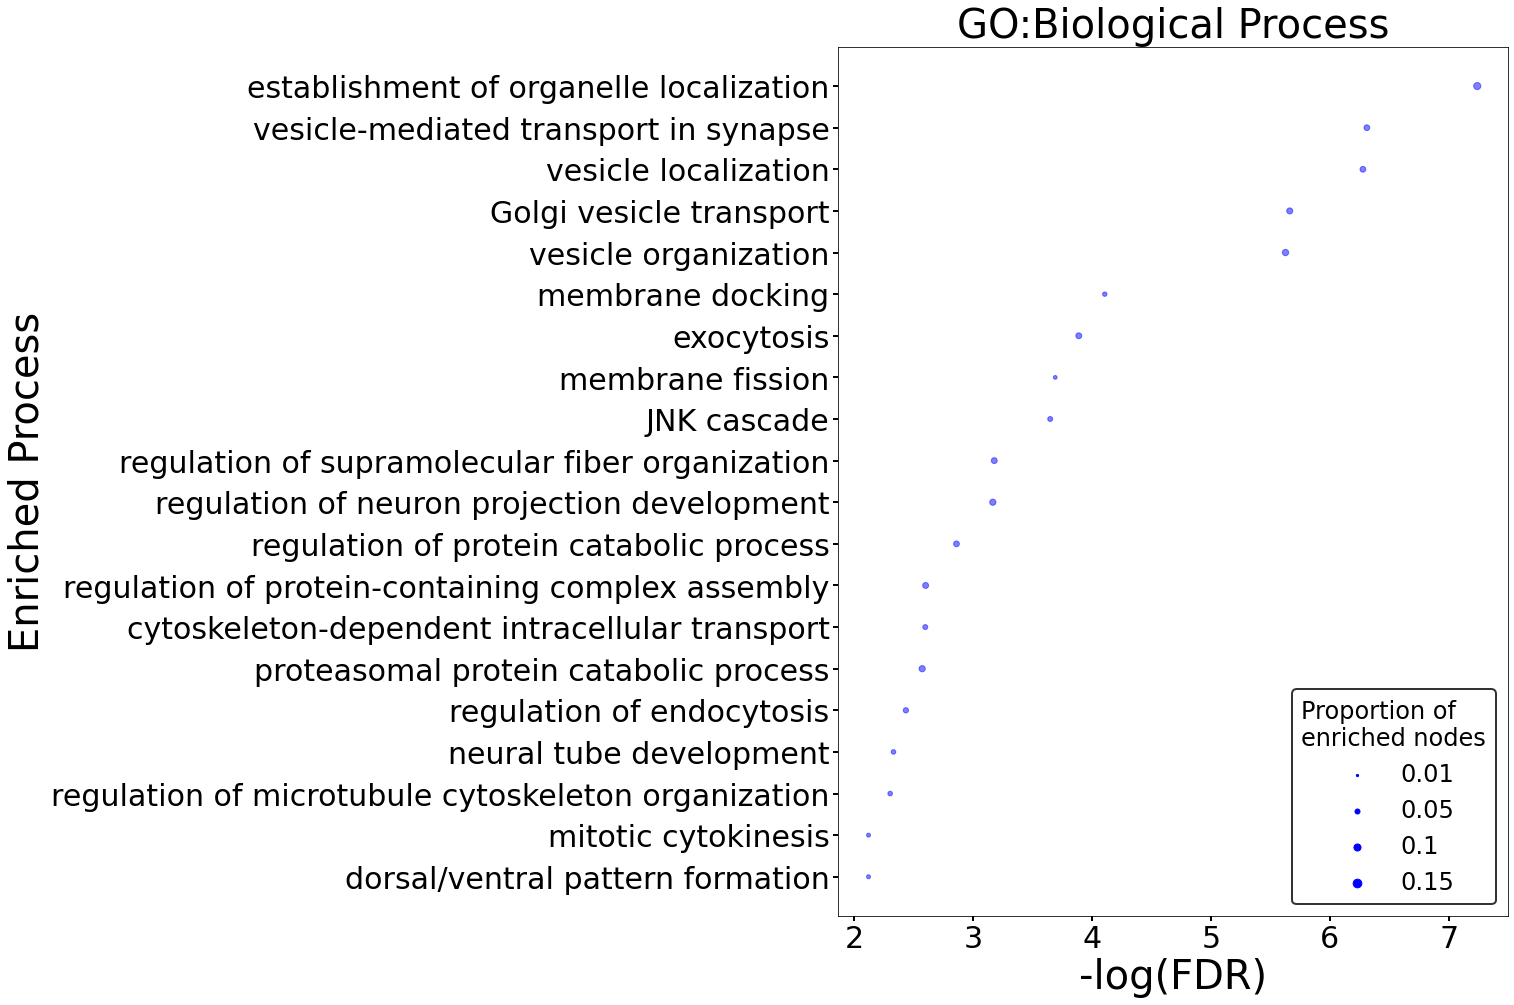

In [51]:
ER_full_GOBP_filtered['-log(FDR)'] = -np.log10(ER_full_GOBP_filtered['p_value'])
ER_full_GOBP_filtered = ER_full_GOBP_filtered.sort_values(by='-log(FDR)', ascending=True)
df = ER_full_GOBP_filtered.copy()
# subset top 20
df = df.iloc[7:]

plt.figure(figsize=(12, 16))
plt.scatter(df["-log(FDR)"], df.name, s=df["precision"]*500, alpha=0.5, color = 'blue')
plt.yticks(df.name, df["name"], fontsize = 30)
# Set xtick size, fontsize, and thickness
plt.xticks(fontsize=30)

# Set ytick size, fontsize, and thickness
plt.yticks(fontsize=30)
plt.tick_params(axis='both', which='major', width=2, length=5)

plt.xlabel("-log(FDR)", fontsize = 40)
plt.ylabel("Enriched Process", fontsize = 40)
plt.title("GO:Biological Process", fontsize = 40)
# Create legend
sizes = [0.01, 0.05, 0.1, 0.15]  # Example sizes for legend
legend_labels = [str(size) for size in sizes]  # Example legend labels
legend_handles = [plt.scatter([], [], s=size*500, color = 'blue',label=label) for size, label in zip(sizes, legend_labels)]
legend = plt.legend(handles=legend_handles, labels=legend_labels, title='Proportion of\nenriched nodes', fontsize=24,
                    loc = 'lower right')
frame = legend.get_frame()
frame.set_edgecolor('black')  # Set the edge color of the bounding box
frame.set_linewidth(2)  # Set the linewidth of the bounding box

# Set legend title size
legend.get_title().set_fontsize(24)  # Set legend title size to 15
plt.savefig('../Figures/network_allnodes_GOenrichment.png', format='png', bbox_inches='tight')
plt.savefig('../Figures/network_allnodes_GOenrichment.eps', format='eps', bbox_inches='tight')
plt.show()

In [49]:
min(df.precision), max(df.precision)

(0.02797202797202797, 0.1013986013986014)

## Pathway enrichment for baseline prize list

In [3]:
# load all prizes
prize_df = pd.read_csv('../Prize_Inputs/prize_scaled.txt', header = 0, index_col = 0, delimiter = '\t')
prize_df

,prize_val,source,magnitude,prize_val_original
id,,,,
HPGD,0.040530,fly genetic screen,0,2.177829
SSTR2,0.040530,fly genetic screen,0,2.177829
COPS2,0.040530,fly genetic screen,0,2.177829
AP1G1,0.040530,fly genetic screen,0,2.177829
AP2M1,0.040530,fly genetic screen,0,2.177829
...,...,...,...,...
PDCD11,0.039016,huntington's AOO modifiers,0,2.103626
PPP2R2B,0.087559,huntington's AOO modifiers,0,4.482836
PSAPL1,0.000000,huntington's AOO modifiers,0,0.191362


In [6]:
outputdir = f'../Network_Outputs/gProfiler'

source_list = ['GO:BP']    
gp = GProfiler(return_dataframe = True)
ER_Prize_GOBP = gp.profile(organism = 'hsapiens', query = list(prize_df.index),
                                    sources = source_list, no_evidences=False)
with pd.ExcelWriter(outputdir + f'/ER_Prize_GOBP.xlsx') as writer:
    ER_Prize_GOBP.to_excel(writer)
ER_Prize_GOBP

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences
0,GO:BP,GO:0007399,nervous system development,2.821957e-10,True,"""The process whose specific outcome is the pro...",2531,316,86,21031,0.272152,0.033979,query_1,[GO:0048731],"[SSTR2, COPS2, APC, PRKCI, APP, CTNNB1, ATXN1,...","[[IEA], [IEA], [IBA], [IDA, IMP, IEA], [IDA, I..."
1,GO:BP,GO:0051649,establishment of localization in cell,5.689801e-10,True,"""Any process, occuring in a cell, that localiz...",1972,316,73,21031,0.231013,0.037018,query_1,"[GO:0051234, GO:0051641]","[AP1G1, AP2M1, APC, APP, CTNNB1, ATXN1, BICD1,...","[[IMP, IBA, IEA], [IDA, IMP, NAS, IEA], [IMP, ..."
2,GO:BP,GO:0051234,establishment of localization,1.617193e-09,True,"""Any process that localizes a substance or cel...",4881,316,130,21031,0.411392,0.026634,query_1,[GO:0051179],"[AP1G1, AP2M1, APC, PRKCI, APP, CTNNB1, GABARA...","[[IMP, IBA, NAS, IEA], [IDA, IMP, IBA, TAS, NA..."
3,GO:BP,GO:0051128,regulation of cellular component organization,1.671214e-09,True,"""Any process that modulates the frequency, rat...",2425,316,82,21031,0.259494,0.033814,query_1,"[GO:0016043, GO:0050794]","[AP2M1, APC, PRKCI, APP, CTNNB1, ACTR8, ARPC3,...","[[IEA], [IDA, IMP, IBA], [IDA, IMP], [IDA, IMP..."
4,GO:BP,GO:0006810,transport,4.937779e-09,True,"""The directed movement of substances (such as ...",4350,316,119,21031,0.376582,0.027356,query_1,[GO:0051234],"[AP1G1, AP2M1, PRKCI, APP, CTNNB1, GABARAP, AT...","[[IMP, IBA, NAS, IEA], [IDA, IMP, IBA, TAS, NA..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,GO:BP,GO:0035295,tube development,4.446525e-02,True,"""The process whose specific outcome is the pro...",1091,316,35,21031,0.110759,0.032081,query_1,"[GO:0007275, GO:0048856]","[HPGD, CTNNB1, NPR1, DLL1, MYC, PAX6, EYA1, FZ...","[[ISS, IEA], [IMP, ISS, TAS, IEA], [TAS], [ISS..."
157,GO:BP,GO:0042063,gliogenesis,4.447099e-02,True,"""The process that results in the generation of...",345,316,17,21031,0.053797,0.049275,query_1,[GO:0022008],"[PRKCI, APP, CTNNB1, CRB1, PTPN11, DLL1, ERBB3...","[[IMP], [IGI], [IEA], [IEA], [IEA], [ISS, IEA]..."
158,GO:BP,GO:0007346,regulation of mitotic cell cycle,4.781420e-02,True,"""Any process that modulates the rate or extent...",496,316,21,21031,0.066456,0.042339,query_1,"[GO:0000278, GO:0051726]","[APC, APP, CTNNB1, DDX3X, PTPN11, GBF1, HSF1, ...","[[IMP], [ISS, IEA], [ISS, IEA], [IMP], [IEA], ..."
159,GO:BP,GO:0010917,negative regulation of mitochondrial membrane ...,4.893077e-02,True,"""Any process that stops, prevents, or reduces ...",12,316,4,21031,0.012658,0.333333,query_1,"[GO:0045837, GO:0051881]","[TRPV1, ARL6IP5, MAPT, PIP5KL1]","[[IEA], [IMP], [IMP], [IDA]]"


## Network annotation and visualization (output to graphml for cytoscape vis)

In [3]:
# load networks # lv_clusters.pkl
network_input_dir = '../Network_Outputs/pickles/111221_cortex/Ex_W01_B50_G05_K10_w10/'
lv_clusters = pickle.load(open(network_input_dir+'lv_clusters.pkl', 'rb'))

In [7]:
network.nodes(data=True)

NodeDataView({'CSNK1E': {'prize': 0.07526139783231213, 'source': 'ND modifier', 'magnitude': 0.0, 'prize_val_original': 2.177828716821039, 'naive_prize': 0.0405300633726376, 'score': 0.034731334459674516, 'terminal': True, 'type': 'protein', 'degree': 16, 'betweenness': 0.01659266434616251, 'louvain_clusters': '0', 'location': 'nucleus', 'general_process': 'cellular process', 'specific_process': 'cellular response to stimulus', 'general_function': 'catalytic', 'specific_function': 'transferase', 'robustness': 1.0, 'specificity': 0.07, 'Direction': 'NA'}, 'SFRP1': {'prize': 0.04725244873592942, 'source': 'HD modifier', 'magnitude': 0.0, 'prize_val_original': 3.0535062172279304, 'naive_prize': 0.0583965921687506, 'score': -0.01114414343282118, 'terminal': True, 'type': 'protein', 'degree': 2, 'betweenness': 0.006557377049180328, 'louvain_clusters': '0', 'location': 'extracellular', 'general_process': 'biological regulation', 'specific_process': 'regulation of biological process', 'genera

In [8]:
# load metadata
GEM_eQTL_meta_df = pd.read_csv('../Prize_Inputs/GeMHD-Mega/mega_analysis_xQTL_all_MAF0.003_eQTLs_sort-pval.top2K_headers.txt',
                                header=0, delimiter = '\t')
VZ_eQTL_meta_df=pd.read_csv('../Prize_Inputs/Venezuelan/LZ-gwas-n390-YJ-top2K_annotated-tsv-eQTLs.txt', 
                            header=0, delimiter = '\t')

# annotate steiner nodes
for cluster,network in lv_clusters.items():
    for node in network.nodes:
        if network.nodes[node]['source'] == 'HD modifier':
            if network.nodes[node]['Direction'] == 'Positive':
                network.nodes[node]['source_direction'] = 'Positive HD modifier'
            elif network.nodes[node]['Direction'] == 'Negative':
                network.nodes[node]['source_direction'] = 'Negative HD modifier'
            
            # 
            if network.nodes[node]['Data_source'] == 'GEM Mega eQTL':
                df = GEM_eQTL_meta_df[GEM_eQTL_meta_df['eQTL Gene'] == node]
                df.sort_values(by = 'eQTL pval', inplace=True) 
                network.nodes[node]['eQTL_coeff'] = float(df.iloc[0]['eQTL coefficient']) # get lowest eQTL pval mapping result
            
            elif network.nodes[node]['Data_source'] == 'VZ eQTL':
                df = VZ_eQTL_meta_df[VZ_eQTL_meta_df['eQTL_gene'] == node]
                df.sort_values(by = 'eQTL_pvalue', inplace=True) 
                network.nodes[node]['eQTL_coeff'] = float(df.iloc[0]['eQTL_rho']) # get lowest eQTL pval mapping result
        # transfer ND modifier and Steiner node labels        
        elif network.nodes[node]['source'] == 'ND modifier':
            network.nodes[node]['source_direction'] = 'ND modifier'
        elif network.nodes[node]['source'] == 'Steiner Node':
            network.nodes[node]['source_direction'] = 'Steiner Node'

In [9]:
# check update
node_df = oi.get_networkx_graph_as_dataframe_of_nodes(network)
node_df

,prize,source,magnitude,prize_val_original,naive_prize,score,terminal,type,degree,betweenness,...,general_process,specific_process,general_function,specific_function,robustness,specificity,Direction,source_direction,Data_source,eQTL_coeff
SPRY3,0.055889,ND modifier,0.0,2.177829,0.040530,0.015359,True,protein,1,0.000000,...,multicellular organismal process,multicellular organism development,NaN,NaN,1.00,0.02,NA,ND modifier,NaN,NaN
SYBU,0.000000,Steiner Node,NaN,NaN,NaN,NaN,False,protein,2,0.000890,...,cellular process,movement of cell or subcellular component,binding,protein binding,1.00,0.01,NA,Steiner Node,NaN,NaN
ATXN1,0.070518,ND modifier,0.0,2.177829,0.040530,0.029988,True,protein,8,0.021044,...,metabolic process,nitrogen compound metabolic process,binding,protein binding,1.00,0.14,NA,ND modifier,NaN,NaN
SV2A,0.000000,Steiner Node,NaN,NaN,NaN,NaN,False,protein,2,0.000829,...,cellular process,cell communication,transporter,transmembrane transporter,0.83,0.00,NA,Steiner Node,NaN,NaN
OAZ1,0.000000,Steiner Node,NaN,NaN,NaN,NaN,False,protein,3,0.007917,...,biological regulation,regulation of biological process,molecular function regulator,enzyme regulator,0.66,0.03,NA,Steiner Node,NaN,NaN
PGM2L1,0.109704,HD modifier,0.0,2.387069,0.044799,0.064904,True,protein,1,0.000000,...,metabolic process,primary metabolic process,catalytic,transferase,1.00,0.05,Negative,Negative HD modifier,GEM Mega eQTL,-0.181641
VSNL1,0.000000,Steiner Node,NaN,NaN,NaN,NaN,False,protein,2,0.006557,...,biological regulation,regulation of biological process,binding,protein binding,0.85,0.01,NA,Steiner Node,NaN,NaN


In [11]:
# output network as cytoscape 
outputdir = '../Network_Outputs/pickles/111221_cortex/Ex_W01_B50_G05_K10_w10/graphml'
for cluster, network in lv_clusters.items():
    oi.output_networkx_graph_as_graphml_for_cytoscape(network, output_dir = outputdir,
                                                      filename='lv_cluster_{}.graphml'.format(cluster))
# output network as html for website
outputdir = '../Network_Outputs/pickles/111221_cortex/Ex_W01_B50_G05_K10_w10/html'
for key in lv_clusters.keys():
    network = lv_clusters[key]
    oi.output_networkx_graph_as_interactive_html(network, 
                                                 output_dir = outputdir, filename = 'Cluster_{}_robust_network.html'.format(key))

# export interactome and connected OI network (prior to subnetwork generation) for visualization


In [1]:
import pickle
from gprofiler import GProfiler
import nbimporter
import numpy as np
import pandas as pd
import networkx as nx
import OmicsIntegrator as oi
import community
from scipy import stats
import warnings
#import mygene
warnings.filterwarnings('ignore')
# Plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
plt.rcParams['font.family'] = 'Arial'

In [3]:
# load networks
outputdir = '../Network_Outputs/pickles/111221_cortex/Ex_W01_B50_G05_K10_w10/'
mynetwork = pickle.load(open(outputdir + 'mynetwork.pkl', 'rb'))
print(mynetwork.nodes())

outputdir_int = '../Interactome/iref17_iref14_braInMap_ptau_metab_mapped_cortex_adjusted.txt'
interactome = pd.read_csv(outputdir_int, sep = '\t')
interactome

['VAMP2', 'PTPN11', 'BICD1', 'EXOC3', 'CUL1', 'CHD1L', 'HSP90B1', 'RABEP1', 'FHOD3', 'SYT9', 'HNF4A', 'ATXN1', 'GADD45G', 'ERBB3', 'ZSCAN5A', 'RGS17', 'SPATA13', 'RAP2A', 'ITSN2', 'NCK1', 'CSNK2A1', 'ROCK1', 'HLA-C', 'CKAP5', 'HMDB0001175', 'CSNK1A1', 'RBM11', 'TRAF1', 'MAPRE1', 'MTRF1L', 'PDCD11', 'PSMA4', 'CUX1', 'EXOC4', 'STAT5B', 'ENO3', 'FANK1', 'PTCH1', 'LSM8', 'MBTPS1', 'RAD54L', 'RNF14', 'LHX3', 'TRPV1', 'BHLHE41', 'DDX3X', 'SNX24', 'LSM6', 'CHAT', 'RPA3', 'SYT4', 'LMNB1', 'GNB3', 'NR1D1', 'MAPT', 'PICK1', 'FLOT1', 'PAX3', 'TIPRL', 'SVIL', 'PNMA1', 'HES6', 'UBE2Z', 'MPI', 'SYT1', 'DGKE', 'RAB11FIP4', 'TMEM53', 'FGF14', 'RTN4IP1', 'AP3S2', 'ASIC2', 'CSNK1E', 'MYC', 'SPINT2', 'CDHR3', 'C17orf67', 'SMAD5', 'ING1', 'NUS1', 'UBR2', 'MARK1', 'RBM6', 'GAS7', 'VDAC3', 'SSTR2', 'SCN8A', 'UBA6', 'AP1G2', 'MAP2K7', 'WDR48', 'MSH3', 'EFHC2', 'RAB3C', 'TRRAP', 'TLR7', 'SCAF1', 'MLIP', 'FAM199X', 'GNPDA1', 'PBLD', 'GCNT1', 'CDIPT', 'RASA1', 'DDAH1', 'MBTD1', 'PPP4C', 'GUF1', 'SNAP29', 'MYCBP

,protein1,protein2,cost,Ast_rank,Ex_rank,In_rank,Opc_rank,Oli_rank,Mic_rank
0,AARS1,AAR2,0.598835,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ABCA12,ABCA1,0.276189,0.340700,0.219856,0.273473,0.281477,0.205953,0.212251
2,ABCC6,A1BG,0.443583,0.259096,0.259083,0.249755,0.175694,0.171112,0.282914
3,ABCD2,ABCD1,0.248249,0.331748,0.209683,0.234533,0.212639,0.298310,0.343117
4,ABCD3,ABCD1,0.262835,0.331748,0.209683,0.234533,0.212639,0.298310,0.367808
...,...,...,...,...,...,...,...,...,...
1307695,TMEM55A,HMDB0010140,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1307696,TMEM55B,HMDB0010140,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1307697,TPTE2,HMDB0010140,0.600000,0.378652,0.270930,0.379582,0.473539,0.313349,0.282805
1307698,ACAP1,HMDB0010140,0.600000,0.321283,0.245601,0.324695,0.226928,0.350434,0.394595


In [8]:
# verify mynetwork for clustering annotations
node_df = oi.get_networkx_graph_as_dataframe_of_nodes(mynetwork)
print(len(set(node_df.louvain_clusters)))

12


In [12]:
# create interactome graph
int_graph = nx.Graph()
for index, row in interactome.iterrows():
    int_graph.add_edge(row['protein1'], row['protein2'], cost =row['cost'], 
                      Ast_rank = row['Ast_rank'],
                      Ex_rank = row['Ex_rank'],
                      In_rank = row['In_rank'],
                      Opc_rank = row['Opc_rank'],
                      Oli_rank = row['Oli_rank'],
                      Mic_rank = row['Mic_rank'])
print(len(int_graph.nodes()))
print(len(int_graph.edges()))
#print(int_graph.edges(data=True))


39827
1307120


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [13]:
print(len(int_graph.edges()))

1307120


In [14]:
# export graph
outputdir = '../Network_Outputs/pickles/111221_cortex/Ex_W01_B50_G05_K10_w10/graphml'
oi.output_networkx_graph_as_graphml_for_cytoscape(mynetwork, output_dir = outputdir,
                                                      filename='Full_PCSF_Network.graphml')
oi.output_networkx_graph_as_graphml_for_cytoscape(int_graph, output_dir = outputdir,
                                                      filename='Interactome_Network.graphml')

PosixPath('/nfs/latdata/bkang/Codes_Publication_2024/Network_Outputs/pickles/111221_cortex/Ex_W01_B50_G05_K10_w10/graphml/Interactome_Network.graphml')

In [16]:
for cluster in set(node_df.louvain_clusters):
    print(cluster,node_df[node_df.louvain_clusters == cluster].shape[0])

10 32
11 7
3 14
0 22
8 48
7 4
1 30
5 19
9 24
2 24
4 29
6 53


In [20]:
# annotate nodes in int_graph
int_node_df = pd.DataFrame(index = list(int_graph.nodes()), columns = ['PCSF'])
int_node_df['PCSF'] = 0 
int_node_df.loc[list(mynetwork.nodes()), 'PCSF'] = 1
int_node_df


,PCSF
AARS1,0
AAR2,0
ABCA12,0
ABCA1,0
ABCC6,0
...,...
HMDB0043880,0
HMDB0051152,0
HMDB0046879,0
HMDB0043355,0


In [23]:
# Add node attributes
for index, row in int_node_df.iterrows():
    int_graph.nodes[index].update({'PCSF': row['PCSF']})


In [26]:
# output network
oi.output_networkx_graph_as_graphml_for_cytoscape(int_graph, output_dir = outputdir,
                                                      filename='Interactome_Network.graphml')

PosixPath('/nfs/latdata/bkang/Codes_Publication_2024/Network_Outputs/pickles/111221_cortex/Ex_W01_B50_G05_K10_w10/graphml/Interactome_Network.graphml')